# Steps to solve Emergency vs Non-Emergency vehicle classification problem

<ol>1. Loading the dataset</ol>
<ol>2. Pre-processing the data</ol>
<ol>3. Creating training and validation set</ol>
<ol>4. Defining the model architecture</ol>
<ol>5. Compiling the model</ol>
<ol>6. Training the model</ol>
<ol>7. Evaluating model performance</ol>

## 1. Loading the dataset

In [1]:
# import necessary libraries and functions
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline

from keras.layers import Dense, InputLayer
from keras.models import Sequential

from sklearn.model_selection import train_test_split

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# !unzip /content/drive/MyDrive/AV/Course_Handouts_Fundamentals_of_Deep_Learning/Dataset.zip

In [63]:
# reading the csv file
data = pd.read_csv('Dataset/emergency_classification.csv')

In [64]:
# create random number generator
seed = 42
rng = np.random.RandomState(seed)

In [65]:
# looking at first five rows of the data
data.head()

,image_names,emergency_or_not
0,0.jpg,1
1,1.jpg,1
2,2.jpg,1
3,3.jpg,1
4,4.jpg,1


In [66]:
# distribution of classes in the dataset
data['emergency_or_not'].value_counts()

emergency_or_not
0    1361
1     991
Name: count, dtype: int64

In [67]:
# load images and store it in numpy array

# empty list to store the images
X = []
# iterating over each image
for img_name in data.image_names:
    # loading the image using its name
    img = plt.imread('Dataset/images/' + img_name)
    # saving each image in the list
    X.append(img)
    
# converting the list of images into array
X=np.array(X)

# storing the target variable in separate variable
y = data.emergency_or_not.values

In [68]:
X.shape

(2352, 224, 224, 3)

In [69]:
from skimage.io import imread, imshow

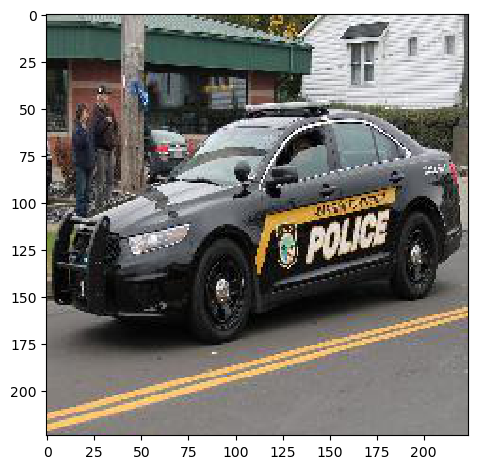

In [70]:
imshow(X[90])

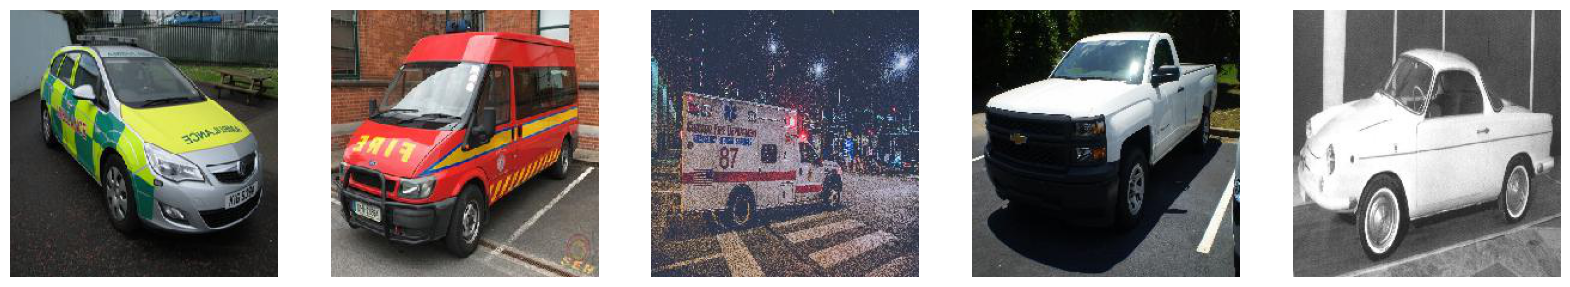

In [71]:
# visualizing images
fig,ax = plt.subplots(nrows=1,ncols=5,figsize=(20,20))
for i in range(5):
    ax[i].imshow(X[i*370])
    ax[i].axis('off')

## 2. Pre-processing the data

![alt text](https://drive.google.com/uc?id=1qrMvsKOgTmo4Zt93r8G84Z5I_2IfVduq)

In [72]:
X.shape

(2352, 224, 224, 3)

In [73]:
# converting 3 dimensional image to 1 dimensional image
X = X.reshape(X.shape[0], 224*224*3)
X.shape

(2352, 150528)

In [74]:

# for i in X[9]:
#     print(i)

In [75]:
# minimum and maximum pixel values of images
X.min(), X.max()

(0, 255)

In [76]:
# normalizing the pixel values
X = X / X.max()

In [77]:
# minimum and maximum pixel values of images after normalizing
X.min(), X.max()

(0.0, 1.0)

In [80]:
for i in X:
    col = i
    

In [82]:
rd = pd.Dataframe(col:X)

SyntaxError: invalid syntax (772063552.py, line 1)

## 3. Creating training and validation set

In [27]:
# creating a training and validation set
X_train, X_valid, y_train, y_valid=train_test_split(X,y,test_size=0.3, random_state=seed)

In [28]:
# shape of training and validation set
(X_train.shape, y_train.shape), (X_valid.shape, y_valid.shape)

(((1646, 150528), (1646,)), ((706, 150528), (706,)))

In [37]:
X_train.shape[1]

150528

## 4. Defining the model architecture

In [38]:
# defining the architecture of the model
model=Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(units = 10, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

In [39]:
# summary of the model
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 10)                  │       1,505,290 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,505,301 (5.74 MB)

 Trainable params: 1,505,301 (5.74 MB)

 Non-trainable params: 0 (0.00 B)

## 5. Compiling the model

In [41]:
# compiling the model
model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

## 6. Training the model

In [42]:
X.shape

(2352, 150528)

In [43]:
# training the model
model_history = model.fit(X_train, y_train, epochs=50, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 127ms/step - accuracy: 0.5764 - loss: 0.7078 - val_accuracy: 0.5609 - val_loss: 0.6843
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.6005 - loss: 0.6675 - val_accuracy: 0.5751 - val_loss: 0.6640
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.6483 - loss: 0.6299 - val_accuracy: 0.6756 - val_loss: 0.6175
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.6652 - loss: 0.6338 - val_accuracy: 0.6317 - val_loss: 0.6465
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.6779 - loss: 0.6141 - val_accuracy: 0.6686 - val_loss: 0.6135
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.6983 - loss: 0.5987 - val_accuracy: 0.6912 - val_loss: 0.5967
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.6662 - loss: 0.6166 - val_accuracy: 0.6558 - val_loss: 0.6167
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.6915 - loss: 0.5969 - val_accuracy: 0.6544 - 

## 7. Evaluating model performance

In [50]:
# getting predictions in the form of class as well as probabilities

predictions = model.predict(X_valid)[:, 0]

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [51]:
prediction = predictions.reshape(-1,)

# converting probabilities to classes
prediction_int = prediction >= 0.5
prediction_int = prediction_int.astype(np.int)

AttributeError: module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [52]:
# accuracy on validation set
from sklearn.metrics import accuracy_score
print('Accuracy on validation set:', accuracy_score(y_valid, prediction_int), '%')

Accuracy on validation set: 0.7124645892351275 %


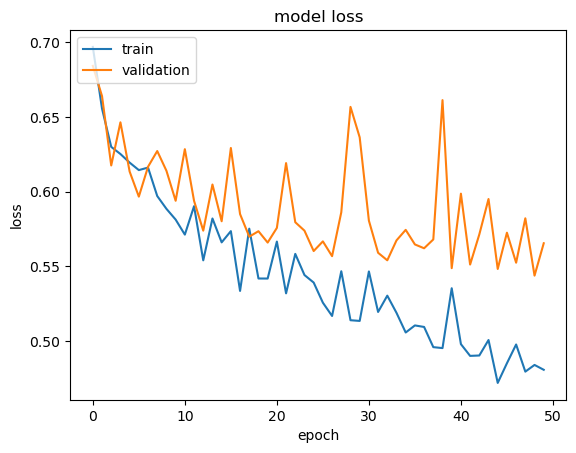

In [53]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

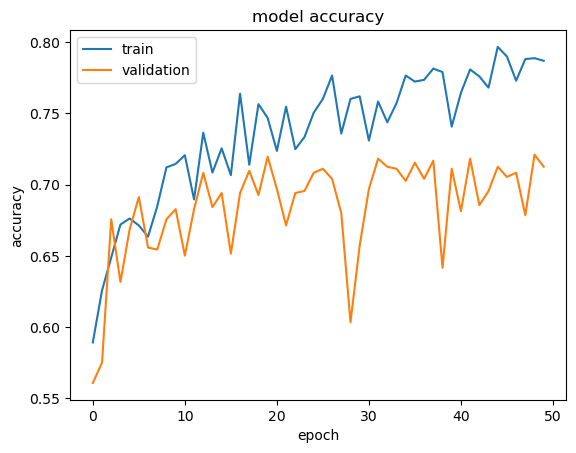

In [54]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Model is 74 % sure that it is emergency
And actual class is  1


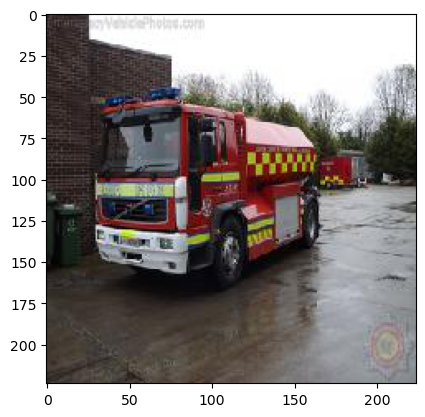

In [56]:
# pull out the original images from the data which correspond to the validation data
_, valid_vehicles, _, valid_y = train_test_split(data.image_names.values, y, test_size=0.3, random_state=seed)

# get a random index to plot image randomly
index = rng.choice(range(len(valid_vehicles)))

# get the corresponding image name and probability
img_name = valid_vehicles[index]
prob = (predictions * 100).astype(int)[index]

# read the image
img = plt.imread('Dataset/images/' + img_name)

# print probability and actual class
print('Model is', prob , '% sure that it is emergency')
print('And actual class is ', valid_y[index])

# plot image
plt.imshow(img)

# Hyperparameter tuning of neural networks

<ol>1. change activation function of hidden layer</ol>
<ol>2. increase hidden neurons</ol>
<ol>3. increase hidden layers</ol>
<ol>4. increase number of epochs</ol>
<ol>5. change optimizer</ol>

### 1. Changing activation function of hidden layer

In [58]:
# using relu as activation function in hidden layer
model=Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(100, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# compiling the model
model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [59]:
# summary of the model
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                     │ (None, 100)                 │      15,052,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,053,001 (57.42 MB)

 Trainable params: 15,053,001 (57.42 MB)

 Non-trainable params: 0 (0.00 B)

In [60]:
# training the model for 50 epochs
model_history = model.fit(X_train, y_train, epochs=50, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 307ms/step - accuracy: 0.5258 - loss: 1.7907 - val_accuracy: 0.5609 - val_loss: 0.6776
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 273ms/step - accuracy: 0.5775 - loss: 0.6710 - val_accuracy: 0.5623 - val_loss: 0.6531
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 291ms/step - accuracy: 0.5961 - loss: 0.6562 - val_accuracy: 0.5623 - val_loss: 0.6450
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 233ms/step - accuracy: 0.6029 - loss: 0.6345 - val_accuracy: 0.6643 - val_loss: 0.6231
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 220ms/step - accuracy: 0.6532 - loss: 0.6285 - val_accuracy: 0.6785 - val_loss: 0.6055
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 220ms/step - accuracy: 0.6218 - loss: 0.6442 - val_accuracy: 0.6771 - val_loss: 0.6050
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 220ms/step - accuracy: 0.6912 - loss: 0.6017 - val_accuracy: 0.5212 - val_loss: 0.7128
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 216ms/step - accuracy: 0.6340 - loss: 0.6372 - val_accuracy: 0.

In [134]:
# getting predictions in the form of class as well as probabilities

predictions = model.predict(X_valid)[:, 0]
prediction = predictions.reshape(-1,)

# converting probabilities to classes
prediction_int = prediction >= 0.5
prediction_int = prediction_int.astype(np.int)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


AttributeError: module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [ ]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid,prediction_int), '%')

Accuracy on validation set: 0.6869688385269122 %


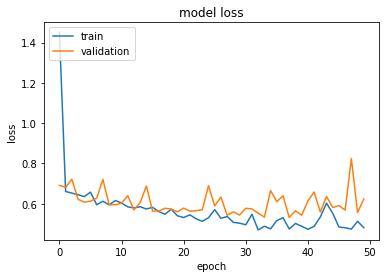

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### 2. Increasing hidden neurons

In [ ]:
# increase hidden neurons
model=Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(1024, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

# compiling the model
model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [ ]:
# model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              154141696 
                                                                 
 dense_1 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 154,142,721
Trainable params: 154,142,721
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_history = model.fit(X_train, y_train, epochs=50, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/50
13/13 [==============================] - 4s 143ms/step - loss: 1.5253 - accuracy: 0.5176 - val_loss: 0.7579 - val_accuracy: 0.5623
Epoch 2/50
13/13 [==============================] - 1s 82ms/step - loss: 0.7061 - accuracy: 0.5820 - val_loss: 0.6549 - val_accuracy: 0.5921
Epoch 3/50
13/13 [==============================] - 1s 82ms/step - loss: 0.6289 - accuracy: 0.6434 - val_loss: 0.6641 - val_accuracy: 0.5836
Epoch 4/50
13/13 [==============================] - 1s 83ms/step - loss: 0.6155 - accuracy: 0.6665 - val_loss: 0.6292 - val_accuracy: 0.6317
Epoch 5/50
13/13 [==============================] - 1s 82ms/step - loss: 0.6280 - accuracy: 0.6598 - val_loss: 0.7383 - val_accuracy: 0.5722
Epoch 6/50
13/13 [==============================] - 1s 101ms/step - loss: 0.6708 - accuracy: 0.6130 - val_loss: 0.5897 - val_accuracy: 0.6955
Epoch 7/50
13/13 [==============================] - 1s 109ms/step - loss: 0.5931 - accuracy: 0.6938 - val_loss: 0.5839 - val_accuracy: 0.6898
Epoch 8/50

In [ ]:
# getting predictions in the form of class as well as probabilities

predictions = model.predict(X_valid)[:, 0]
prediction = predictions.reshape(-1,)

# converting probabilities to classes
prediction_int = prediction >= 0.5
prediction_int = prediction_int.astype(np.int)

23/23 [==============================] - 0s 13ms/step


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [ ]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, prediction_int), '%')

Accuracy on validation set: 0.6303116147308782 %


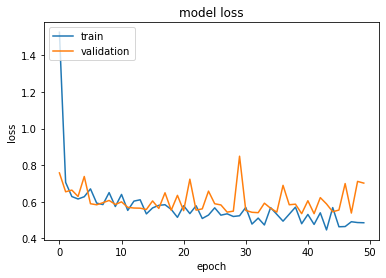

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### 3. Increasing hidden layers

In [129]:
# increase hidden layers
model=Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

# compiling the model
model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [130]:
# model summary
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 100)                 │      15,052,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,063,101 (57.46 MB)

 Trainable params: 15,063,101 (57.46 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_history = model.fit(X_train, y_train, epochs=50, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/50
13/13 [==============================] - 3s 169ms/step - loss: 0.6851 - accuracy: 0.5565 - val_loss: 0.6759 - val_accuracy: 0.5609
Epoch 2/50
13/13 [==============================] - 1s 62ms/step - loss: 0.6642 - accuracy: 0.5954 - val_loss: 0.6674 - val_accuracy: 0.5637
Epoch 3/50
13/13 [==============================] - 1s 60ms/step - loss: 0.6527 - accuracy: 0.6142 - val_loss: 0.6511 - val_accuracy: 0.6586
Epoch 4/50
13/13 [==============================] - 1s 60ms/step - loss: 0.6453 - accuracy: 0.6507 - val_loss: 0.6446 - val_accuracy: 0.6388
Epoch 5/50
13/13 [==============================] - 1s 60ms/step - loss: 0.6389 - accuracy: 0.6464 - val_loss: 0.6369 - val_accuracy: 0.6615
Epoch 6/50
13/13 [==============================] - 1s 62ms/step - loss: 0.6333 - accuracy: 0.6683 - val_loss: 0.6326 - val_accuracy: 0.6586
Epoch 7/50
13/13 [==============================] - 1s 60ms/step - loss: 0.6280 - accuracy: 0.6640 - val_loss: 0.6284 - val_accuracy: 0.6601
Epoch 8/50
1

In [ ]:
# getting predictions in the form of class as well as probabilities

predictions = model.predict(X_valid)[:, 0]
prediction = predictions.reshape(-1,)

# converting probabilities to classes
prediction_int = prediction >= 0.5
prediction_int = prediction_int.astype(np.int)

23/23 [==============================] - 0s 10ms/step


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [ ]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid,prediction_int), '%')

Accuracy on validation set: 0.6940509915014165 %


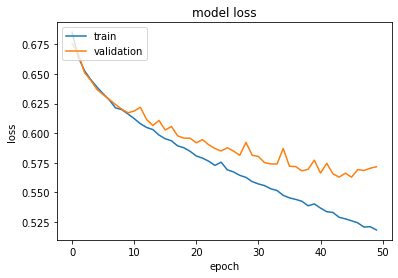

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### 4. Increasing number of epochs

In [ ]:
# increase number of epochs
model=Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [ ]:
# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               15052900  
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,053,001
Trainable params: 15,053,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_history = model.fit(X_train, y_train, epochs=100, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/100
13/13 [==============================] - 4s 165ms/step - loss: 0.8180 - accuracy: 0.5826 - val_loss: 0.6489 - val_accuracy: 0.5949
Epoch 2/100
13/13 [==============================] - 1s 84ms/step - loss: 0.6485 - accuracy: 0.6154 - val_loss: 0.6437 - val_accuracy: 0.6034
Epoch 3/100
13/13 [==============================] - 1s 74ms/step - loss: 0.6326 - accuracy: 0.6440 - val_loss: 0.6376 - val_accuracy: 0.6317
Epoch 4/100
13/13 [==============================] - 1s 72ms/step - loss: 0.6231 - accuracy: 0.6580 - val_loss: 0.6334 - val_accuracy: 0.6374
Epoch 5/100
13/13 [==============================] - 1s 87ms/step - loss: 0.6235 - accuracy: 0.6440 - val_loss: 0.6321 - val_accuracy: 0.6431
Epoch 6/100
13/13 [==============================] - 1s 84ms/step - loss: 0.5911 - accuracy: 0.7066 - val_loss: 0.5858 - val_accuracy: 0.6955
Epoch 7/100
13/13 [==============================] - 1s 79ms/step - loss: 0.5946 - accuracy: 0.6865 - val_loss: 0.5868 - val_accuracy: 0.6997
Epoch

In [ ]:
# getting predictions in the form of class as well as probabilities

predictions = model.predict(X_valid)[:, 0]
prediction = predictions.reshape(-1,)

# converting probabilities to classes
prediction_int = prediction >= 0.5
prediction_int = prediction_int.astype(np.int)

23/23 [==============================] - 0s 10ms/step


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [ ]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, prediction_int), '%')

Accuracy on validation set: 0.726628895184136 %


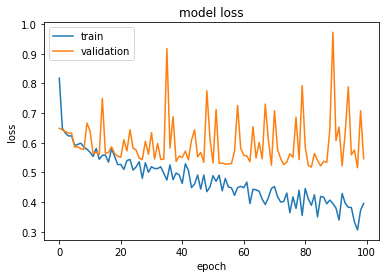

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### 5. Changing the optimizer

In [ ]:
# importing adam optimizer from keras optimizer module 
from keras.optimizers import Adam

In [ ]:
# defining the adam optimizer and setting the learning rate as 10^-5
adam = Adam(lr=1e-5)

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# change optimizer
model=Sequential()

model.add(InputLayer(input_shape=(224*224*3,)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [ ]:
# model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               15052900  
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,063,101
Trainable params: 15,063,101
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_history = model.fit(X_train, y_train, epochs=100, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/100
13/13 [==============================] - 2s 117ms/step - loss: 0.6660 - accuracy: 0.5948 - val_loss: 0.6589 - val_accuracy: 0.5694
Epoch 2/100
13/13 [==============================] - 1s 65ms/step - loss: 0.6385 - accuracy: 0.6349 - val_loss: 0.6355 - val_accuracy: 0.6431
Epoch 3/100
13/13 [==============================] - 1s 63ms/step - loss: 0.6241 - accuracy: 0.6665 - val_loss: 0.6215 - val_accuracy: 0.6586
Epoch 4/100
13/13 [==============================] - 1s 62ms/step - loss: 0.6123 - accuracy: 0.6731 - val_loss: 0.6141 - val_accuracy: 0.6657
Epoch 5/100
13/13 [==============================] - 1s 64ms/step - loss: 0.6037 - accuracy: 0.6883 - val_loss: 0.6076 - val_accuracy: 0.6742
Epoch 6/100
13/13 [==============================] - 1s 63ms/step - loss: 0.5965 - accuracy: 0.7096 - val_loss: 0.6118 - val_accuracy: 0.6657
Epoch 7/100
13/13 [==============================] - 1s 63ms/step - loss: 0.5888 - accuracy: 0.7205 - val_loss: 0.5989 - val_accuracy: 0.6884
Epoch

In [ ]:
# getting predictions in the form of class as well as probabilities

predictions = model.predict(X_valid)[:, 0]
prediction = predictions.reshape(-1,)

# converting probabilities to classes
prediction_int = prediction >= 0.5
prediction_int = prediction_int.astype(np.int)

23/23 [==============================] - 0s 11ms/step


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [ ]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, prediction_int), '%')

Accuracy on validation set: 0.7181303116147308 %


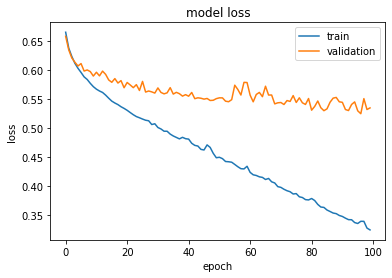

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

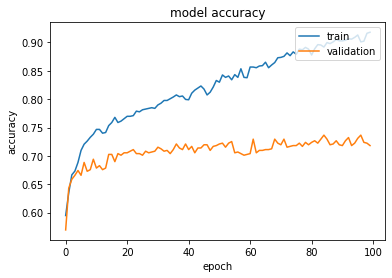

In [ ]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()